In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
ts=pd.read_csv("tsdata.csv")


In [41]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [42]:
# data is an object meas string form lets make it in data format and indexed
ts=pd.read_csv("tsdata.csv", parse_dates=True,index_col='date')

In [43]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [44]:
ts['year']= ts.index.year
ts['month']= ts.index.month

In [45]:
ts.head()

,value,year,month
date,,,
1991-07-01,3.526591,1991,7
1991-08-01,3.180891,1991,8
1991-09-01,3.252221,1991,9
1991-10-01,3.611003,1991,10
1991-11-01,3.565869,1991,11


In [46]:
ts['year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

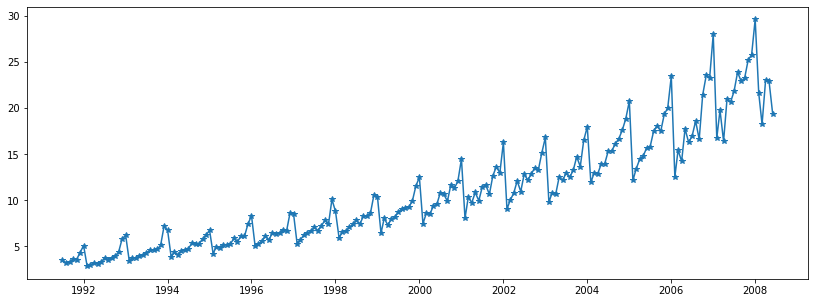

In [47]:
plt.figure(figsize=(14,5))
plt.plot(ts['value'], marker='*')


In [48]:
# for time series analysis import package
from statsmodels.tsa.seasonal import seasonal_decompose

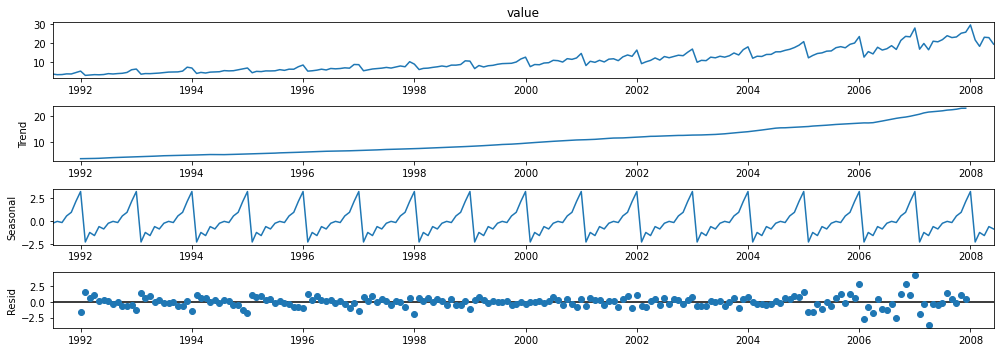

In [49]:
# decompose the time series into 4 parts 
plt.rcParams.update({'figure.figsize':(14,5)})   
#rcparam make thi permanat changes 
# for the sesson here we are setting figsize pernamant for this session
result= seasonal_decompose(ts['value'])
result.plot();

In [50]:
result.trend   #result.  dot and press tab try all methods

date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Name: trend, Length: 204, dtype: float64

In [51]:
list(result.trend)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3.503343575833333,
 3.527891280416666,
 3.565510689583333,
 3.6004468625,
 3.647703085,
 3.7445714220833333,
 3.853234374583333,
 3.9257372779166664,
 3.98502198,
 4.039856095,
 4.094328754166667,
 4.159203131666667,
 4.21573975,
 4.281619881666666,
 4.358072746666666,
 4.423690295416667,
 4.484134937083333,
 4.570665085416667,
 4.650199186249999,
 4.688941935416667,
 4.731116489583332,
 4.77123342875,
 4.811911920833333,
 4.863210834166666,
 4.906251207083333,
 4.957312087499999,
 5.014987626249999,
 5.066220660416667,
 5.120958190416666,
 5.108647023333333,
 5.0687571075,
 5.085123795416666,
 5.1238764479166665,
 5.178167200416667,
 5.236576094583333,
 5.28571281625,
 5.328600610833334,
 5.370634263333333,
 5.403590379583333,
 5.449420217083333,
 5.496435742499999,
 5.560049705833333,
 5.676381903333333,
 5.777785936666666,
 5.8264082579166665,
 5.8717119491666665,
 5.942112915416667,
 6.0018593962499995,
 6.074712791666666,
 6.144521116666667,
 6

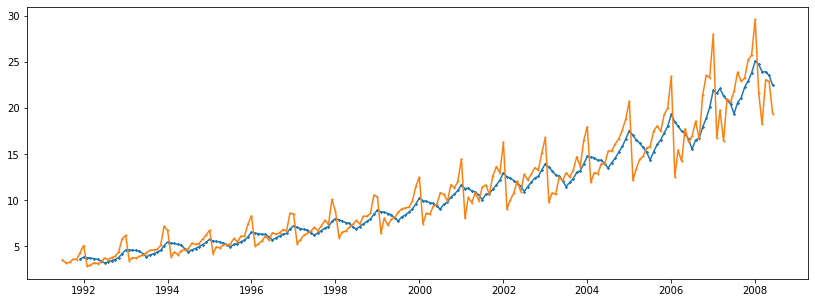

In [52]:
ts['MA']=ts['value'].rolling(6).mean()

plt.plot(ts['MA'],marker='*',ms=2)
plt.plot(ts['value'],marker='o',ms=1)

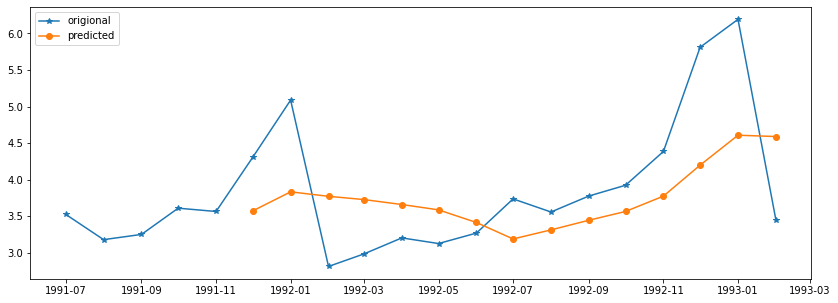

In [53]:
# same as above graph with some modif. use iloc for selected rows graph
ts['MA']=ts['value'].rolling(6).mean()
plt.plot(ts.iloc[:20,0],marker='*',label='origional')
plt.plot(ts.iloc[:20,-1],marker='o', label='predicted')
plt.legend()
plt.show()

# Autoregressiive Integrated moving average

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
len(ts)

204

In [76]:
train_series=ts.iloc[0:163,0]
test_series=ts.iloc[163:,0]

In [77]:
model=ARIMA(train_series, order=(1,1,1))
fittedmodel=model.fit()

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No fre

In [78]:
fittedmodel.forecast()

(array([17.90474163]),
 array([1.37115658]),
 array([[15.21732411, 20.59215915]]))

In [79]:
fittedmodel.forecast()[0]

array([17.90474163])

In [90]:
test_series[0]

12.154552

In [81]:
len(test_series)

41

In [85]:
y_pred=fittedmodel.forecast(steps=41)[0]

In [86]:
len(y_pred)

41

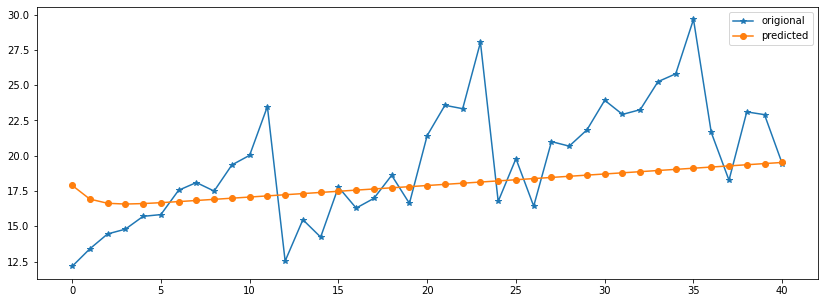

In [93]:
ts['MA']=ts['value'].rolling(6).mean()
plt.plot(np.arange(41), test_series,marker='*',label='origional')
plt.plot(np.arange(41),y_pred,marker='o', label='predicted')
plt.legend()
plt.show()

In [95]:
train_series = ts.iloc[:163,0]
test_series = ts.iloc[163:,0]
history = train_series.tolist()
predictions = []

for v in test_series.tolist():
    model = ARIMA(history, order=(1,1,1))
    fittedmodel = model.fit()
    y_pred = fittedmodel.forecast(steps=1)[0]
    predictions.append(y_pred)
    history.append(v)
    # adding in training data one more data point
    # that data point is picked from the test series

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


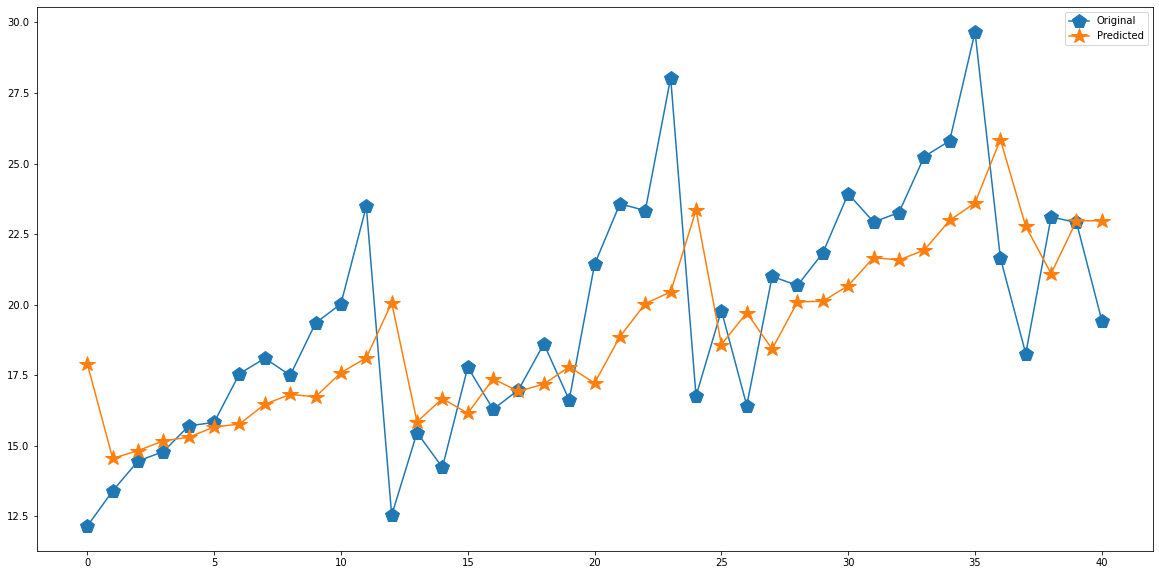

In [96]:
plt.figure(figsize=(20,10))
plt.plot(test_series.values,marker='p',ms=14, label='Original')
plt.plot(predictions,marker='*',ms=16, label='Predicted')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(test_series.values, predictions)

11.020844320929106